In [1]:
import pandas as pd
import numpy as np
import streamlit as st

st.title('Dynamic PCU estimation - Group5')


2023-02-15 11:01:53.728 
  command:

    streamlit run C:\Users\vaibh\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

# Importing the raw data

In [2]:
df = pd.read_excel('traffic_data.xlsx')
df

,Sl no,Lane,Vehicle Type,Entry time,Exit time,Duration,Unnamed: 6
0,1.0,1.0,3.0,0.93,4.37,3.440,300.0
1,2.0,1.0,3.0,10.77,16.27,5.500,600.0
2,3.0,1.0,3.0,16.33,21.97,5.640,900.0
3,4.0,1.0,3.0,32.20,36.37,4.170,1200.0
4,5.0,1.0,4.0,34.20,41.17,6.970,1500.0
...,...,...,...,...,...,...,...
1048569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['Sl no', 'Lane', 'Vehicle Type', 'Entry time', 'Exit time', 'Duration',
       'Unnamed: 6'],
      dtype='object')

In [4]:
new_df = df.copy()

In [5]:
df.drop(df.columns.difference(['Lane', 'Vehicle Type', 'Entry time', 'Exit time', 'Duration']), 1, inplace=True)
df

C:\Users\vaibh\AppData\Local\Temp\ipykernel_4604\1341076010.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(df.columns.difference(['Lane', 'Vehicle Type', 'Entry time', 'Exit time', 'Duration']), 1, inplace=True)


,Lane,Vehicle Type,Entry time,Exit time,Duration
0,1.0,3.0,0.93,4.37,3.440
1,1.0,3.0,10.77,16.27,5.500
2,1.0,3.0,16.33,21.97,5.640
3,1.0,3.0,32.20,36.37,4.170
4,1.0,4.0,34.20,41.17,6.970
...,...,...,...,...,...
1048569,NaN,NaN,NaN,NaN,NaN
1048570,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN


In [6]:
df.dropna(inplace=True)
df

,Lane,Vehicle Type,Entry time,Exit time,Duration
0,1.0,3.0,0.93,4.37,3.44
1,1.0,3.0,10.77,16.27,5.50
2,1.0,3.0,16.33,21.97,5.64
3,1.0,3.0,32.20,36.37,4.17
4,1.0,4.0,34.20,41.17,6.97
...,...,...,...,...,...
4739,1.0,1.0,25951.52,25957.40,5.88
4740,1.0,3.0,25959.32,25965.92,6.60
4741,1.0,3.0,25960.28,25966.36,6.08
4742,1.0,1.0,25963.48,25970.92,7.44


In [7]:
df['Gap'] = np.nan
for i in range(len(df)):
    if 300*(i+1) <=26100:
        df['Gap'][i] = 300*(i+1)
df

,Lane,Vehicle Type,Entry time,Exit time,Duration,Gap
0,1.0,3.0,0.93,4.37,3.44,300.0
1,1.0,3.0,10.77,16.27,5.50,600.0
2,1.0,3.0,16.33,21.97,5.64,900.0
3,1.0,3.0,32.20,36.37,4.17,1200.0
4,1.0,4.0,34.20,41.17,6.97,1500.0
...,...,...,...,...,...,...
4739,1.0,1.0,25951.52,25957.40,5.88,NaN
4740,1.0,3.0,25959.32,25965.92,6.60,NaN
4741,1.0,3.0,25960.28,25966.36,6.08,NaN
4742,1.0,1.0,25963.48,25970.92,7.44,NaN


# FINDING ENTRY AND EXIT FLOW TOTAL AND INTERVAL WISE

In [8]:
df['Speed'] = (62/df['Duration'])*18/5
df

,Lane,Vehicle Type,Entry time,Exit time,Duration,Gap,Speed
0,1.0,3.0,0.93,4.37,3.44,300.0,64.883721
1,1.0,3.0,10.77,16.27,5.50,600.0,40.581818
2,1.0,3.0,16.33,21.97,5.64,900.0,39.574468
3,1.0,3.0,32.20,36.37,4.17,1200.0,53.525180
4,1.0,4.0,34.20,41.17,6.97,1500.0,32.022956
...,...,...,...,...,...,...,...
4739,1.0,1.0,25951.52,25957.40,5.88,NaN,37.959184
4740,1.0,3.0,25959.32,25965.92,6.60,NaN,33.818182
4741,1.0,3.0,25960.28,25966.36,6.08,NaN,36.710526
4742,1.0,1.0,25963.48,25970.92,7.44,NaN,30.000000


In [9]:
df['Cumulative entry flow'] = 0
for i in range(87):
    for j in range(len(df)):
        if df['Entry time'][j] <= df['Gap'][i]:
           df['Cumulative entry flow'][i] = df['Cumulative entry flow'][i]+1
df    

C:\Users\vaibh\AppData\Local\Temp\ipykernel_4604\2504612164.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cumulative entry flow'][i] = df['Cumulative entry flow'][i]+1


,Lane,Vehicle Type,Entry time,Exit time,Duration,Gap,Speed,Cumulative entry flow
0,1.0,3.0,0.93,4.37,3.44,300.0,64.883721,52
1,1.0,3.0,10.77,16.27,5.50,600.0,40.581818,84
2,1.0,3.0,16.33,21.97,5.64,900.0,39.574468,136
3,1.0,3.0,32.20,36.37,4.17,1200.0,53.525180,184
4,1.0,4.0,34.20,41.17,6.97,1500.0,32.022956,226
...,...,...,...,...,...,...,...,...
4739,1.0,1.0,25951.52,25957.40,5.88,NaN,37.959184,0
4740,1.0,3.0,25959.32,25965.92,6.60,NaN,33.818182,0
4741,1.0,3.0,25960.28,25966.36,6.08,NaN,36.710526,0
4742,1.0,1.0,25963.48,25970.92,7.44,NaN,30.000000,0


In [10]:
df['Cumulative exit flow'] = 0
for i in range(87):
    for j in range(len(df)):
        if df['Exit time'][j] <= df['Gap'][i]:
           df['Cumulative exit flow'][i] = df['Cumulative exit flow'][i]+1
df

C:\Users\vaibh\AppData\Local\Temp\ipykernel_4604\3704791918.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cumulative exit flow'][i] = df['Cumulative exit flow'][i]+1


,Lane,Vehicle Type,Entry time,Exit time,Duration,Gap,Speed,Cumulative entry flow,Cumulative exit flow
0,1.0,3.0,0.93,4.37,3.44,300.0,64.883721,52,49
1,1.0,3.0,10.77,16.27,5.50,600.0,40.581818,84,83
2,1.0,3.0,16.33,21.97,5.64,900.0,39.574468,136,134
3,1.0,3.0,32.20,36.37,4.17,1200.0,53.525180,184,182
4,1.0,4.0,34.20,41.17,6.97,1500.0,32.022956,226,225
...,...,...,...,...,...,...,...,...,...
4739,1.0,1.0,25951.52,25957.40,5.88,NaN,37.959184,0,0
4740,1.0,3.0,25959.32,25965.92,6.60,NaN,33.818182,0,0
4741,1.0,3.0,25960.28,25966.36,6.08,NaN,36.710526,0,0
4742,1.0,1.0,25963.48,25970.92,7.44,NaN,30.000000,0,0


In [11]:
df['entry flow interval'] = df['Cumulative entry flow'].shift(0).diff()
df['entry flow interval'][0] = 52
df

C:\Users\vaibh\AppData\Local\Temp\ipykernel_4604\556467641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['entry flow interval'][0] = 52


,Lane,Vehicle Type,Entry time,Exit time,Duration,Gap,Speed,Cumulative entry flow,Cumulative exit flow,entry flow interval
0,1.0,3.0,0.93,4.37,3.44,300.0,64.883721,52,49,52.0
1,1.0,3.0,10.77,16.27,5.50,600.0,40.581818,84,83,32.0
2,1.0,3.0,16.33,21.97,5.64,900.0,39.574468,136,134,52.0
3,1.0,3.0,32.20,36.37,4.17,1200.0,53.525180,184,182,48.0
4,1.0,4.0,34.20,41.17,6.97,1500.0,32.022956,226,225,42.0
...,...,...,...,...,...,...,...,...,...,...
4739,1.0,1.0,25951.52,25957.40,5.88,NaN,37.959184,0,0,0.0
4740,1.0,3.0,25959.32,25965.92,6.60,NaN,33.818182,0,0,0.0
4741,1.0,3.0,25960.28,25966.36,6.08,NaN,36.710526,0,0,0.0
4742,1.0,1.0,25963.48,25970.92,7.44,NaN,30.000000,0,0,0.0


In [12]:
df['exit flow interval'] = df['Cumulative exit flow'].shift(0).diff()
df['exit flow interval'][0] = 49
df

C:\Users\vaibh\AppData\Local\Temp\ipykernel_4604\3370927867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['exit flow interval'][0] = 49


,Lane,Vehicle Type,Entry time,Exit time,Duration,Gap,Speed,Cumulative entry flow,Cumulative exit flow,entry flow interval,exit flow interval
0,1.0,3.0,0.93,4.37,3.44,300.0,64.883721,52,49,52.0,49.0
1,1.0,3.0,10.77,16.27,5.50,600.0,40.581818,84,83,32.0,34.0
2,1.0,3.0,16.33,21.97,5.64,900.0,39.574468,136,134,52.0,51.0
3,1.0,3.0,32.20,36.37,4.17,1200.0,53.525180,184,182,48.0,48.0
4,1.0,4.0,34.20,41.17,6.97,1500.0,32.022956,226,225,42.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...
4739,1.0,1.0,25951.52,25957.40,5.88,NaN,37.959184,0,0,0.0,0.0
4740,1.0,3.0,25959.32,25965.92,6.60,NaN,33.818182,0,0,0.0,0.0
4741,1.0,3.0,25960.28,25966.36,6.08,NaN,36.710526,0,0,0.0,0.0
4742,1.0,1.0,25963.48,25970.92,7.44,NaN,30.000000,0,0,0.0,0.0


# SMS Calculation

In [13]:
df['Travel time in 1 min'] = 0.0
for i in range(87):
    for j in range(len(df)):
        if df['Exit time'][j] <= df['Gap'][i]:
           df['Travel time in 1 min'][i] = df['Travel time in 1 min'][i]+df['Duration'][j]
        else:
            break
df

C:\Users\vaibh\AppData\Local\Temp\ipykernel_4604\4191856694.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Travel time in 1 min'][i] = df['Travel time in 1 min'][i]+df['Duration'][j]


,Lane,Vehicle Type,Entry time,Exit time,Duration,Gap,Speed,Cumulative entry flow,Cumulative exit flow,entry flow interval,exit flow interval,Travel time in 1 min
0,1.0,3.0,0.93,4.37,3.44,300.0,64.883721,52,49,52.0,49.0,306.71
1,1.0,3.0,10.77,16.27,5.50,600.0,40.581818,84,83,32.0,34.0,481.75
2,1.0,3.0,16.33,21.97,5.64,900.0,39.574468,136,134,52.0,51.0,800.48
3,1.0,3.0,32.20,36.37,4.17,1200.0,53.525180,184,182,48.0,48.0,1059.52
4,1.0,4.0,34.20,41.17,6.97,1500.0,32.022956,226,225,42.0,43.0,1265.68
...,...,...,...,...,...,...,...,...,...,...,...,...
4739,1.0,1.0,25951.52,25957.40,5.88,NaN,37.959184,0,0,0.0,0.0,0.00
4740,1.0,3.0,25959.32,25965.92,6.60,NaN,33.818182,0,0,0.0,0.0,0.00
4741,1.0,3.0,25960.28,25966.36,6.08,NaN,36.710526,0,0,0.0,0.0,0.00
4742,1.0,1.0,25963.48,25970.92,7.44,NaN,30.000000,0,0,0.0,0.0,0.00


In [14]:
df['Travel time interval wise'] = df['Travel time in 1 min'].shift(0).diff()
df['Travel time interval wise'][0] = df['Travel time in 1 min'][0]
df

C:\Users\vaibh\AppData\Local\Temp\ipykernel_4604\48610233.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Travel time interval wise'][0] = df['Travel time in 1 min'][0]


,Lane,Vehicle Type,Entry time,Exit time,Duration,Gap,Speed,Cumulative entry flow,Cumulative exit flow,entry flow interval,exit flow interval,Travel time in 1 min,Travel time interval wise
0,1.0,3.0,0.93,4.37,3.44,300.0,64.883721,52,49,52.0,49.0,306.71,306.71
1,1.0,3.0,10.77,16.27,5.50,600.0,40.581818,84,83,32.0,34.0,481.75,175.04
2,1.0,3.0,16.33,21.97,5.64,900.0,39.574468,136,134,52.0,51.0,800.48,318.73
3,1.0,3.0,32.20,36.37,4.17,1200.0,53.525180,184,182,48.0,48.0,1059.52,259.04
4,1.0,4.0,34.20,41.17,6.97,1500.0,32.022956,226,225,42.0,43.0,1265.68,206.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,1.0,1.0,25951.52,25957.40,5.88,NaN,37.959184,0,0,0.0,0.0,0.00,0.00
4740,1.0,3.0,25959.32,25965.92,6.60,NaN,33.818182,0,0,0.0,0.0,0.00,0.00
4741,1.0,3.0,25960.28,25966.36,6.08,NaN,36.710526,0,0,0.0,0.0,0.00,0.00
4742,1.0,1.0,25963.48,25970.92,7.44,NaN,30.000000,0,0,0.0,0.0,0.00,0.00


In [15]:
df['Average travel time every 1 min'] = df['Travel time interval wise']/df['exit flow interval']
df

,Lane,Vehicle Type,Entry time,Exit time,Duration,Gap,Speed,Cumulative entry flow,Cumulative exit flow,entry flow interval,exit flow interval,Travel time in 1 min,Travel time interval wise,Average travel time every 1 min
0,1.0,3.0,0.93,4.37,3.44,300.0,64.883721,52,49,52.0,49.0,306.71,306.71,6.259388
1,1.0,3.0,10.77,16.27,5.50,600.0,40.581818,84,83,32.0,34.0,481.75,175.04,5.148235
2,1.0,3.0,16.33,21.97,5.64,900.0,39.574468,136,134,52.0,51.0,800.48,318.73,6.249608
3,1.0,3.0,32.20,36.37,4.17,1200.0,53.525180,184,182,48.0,48.0,1059.52,259.04,5.396667
4,1.0,4.0,34.20,41.17,6.97,1500.0,32.022956,226,225,42.0,43.0,1265.68,206.16,4.794419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,1.0,1.0,25951.52,25957.40,5.88,NaN,37.959184,0,0,0.0,0.0,0.00,0.00,NaN
4740,1.0,3.0,25959.32,25965.92,6.60,NaN,33.818182,0,0,0.0,0.0,0.00,0.00,NaN
4741,1.0,3.0,25960.28,25966.36,6.08,NaN,36.710526,0,0,0.0,0.0,0.00,0.00,NaN
4742,1.0,1.0,25963.48,25970.92,7.44,NaN,30.000000,0,0,0.0,0.0,0.00,0.00,NaN


In [16]:
df['SMS'] = (62/df['Average travel time every 1 min'])*18/5
df

,Lane,Vehicle Type,Entry time,Exit time,Duration,Gap,Speed,Cumulative entry flow,Cumulative exit flow,entry flow interval,exit flow interval,Travel time in 1 min,Travel time interval wise,Average travel time every 1 min,SMS
0,1.0,3.0,0.93,4.37,3.44,300.0,64.883721,52,49,52.0,49.0,306.71,306.71,6.259388,35.658440
1,1.0,3.0,10.77,16.27,5.50,600.0,40.581818,84,83,32.0,34.0,481.75,175.04,5.148235,43.354662
2,1.0,3.0,16.33,21.97,5.64,900.0,39.574468,136,134,52.0,51.0,800.48,318.73,6.249608,35.714241
3,1.0,3.0,32.20,36.37,4.17,1200.0,53.525180,184,182,48.0,48.0,1059.52,259.04,5.396667,41.358863
4,1.0,4.0,34.20,41.17,6.97,1500.0,32.022956,226,225,42.0,43.0,1265.68,206.16,4.794419,46.554133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,1.0,1.0,25951.52,25957.40,5.88,NaN,37.959184,0,0,0.0,0.0,0.00,0.00,NaN,NaN
4740,1.0,3.0,25959.32,25965.92,6.60,NaN,33.818182,0,0,0.0,0.0,0.00,0.00,NaN,NaN
4741,1.0,3.0,25960.28,25966.36,6.08,NaN,36.710526,0,0,0.0,0.0,0.00,0.00,NaN,NaN
4742,1.0,1.0,25963.48,25970.92,7.44,NaN,30.000000,0,0,0.0,0.0,0.00,0.00,NaN,NaN


In [17]:
df['Exit flow per hour'] = df['exit flow interval']*60
df

,Lane,Vehicle Type,Entry time,Exit time,Duration,Gap,Speed,Cumulative entry flow,Cumulative exit flow,entry flow interval,exit flow interval,Travel time in 1 min,Travel time interval wise,Average travel time every 1 min,SMS,Exit flow per hour
0,1.0,3.0,0.93,4.37,3.44,300.0,64.883721,52,49,52.0,49.0,306.71,306.71,6.259388,35.658440,2940.0
1,1.0,3.0,10.77,16.27,5.50,600.0,40.581818,84,83,32.0,34.0,481.75,175.04,5.148235,43.354662,2040.0
2,1.0,3.0,16.33,21.97,5.64,900.0,39.574468,136,134,52.0,51.0,800.48,318.73,6.249608,35.714241,3060.0
3,1.0,3.0,32.20,36.37,4.17,1200.0,53.525180,184,182,48.0,48.0,1059.52,259.04,5.396667,41.358863,2880.0
4,1.0,4.0,34.20,41.17,6.97,1500.0,32.022956,226,225,42.0,43.0,1265.68,206.16,4.794419,46.554133,2580.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,1.0,1.0,25951.52,25957.40,5.88,NaN,37.959184,0,0,0.0,0.0,0.00,0.00,NaN,NaN,0.0
4740,1.0,3.0,25959.32,25965.92,6.60,NaN,33.818182,0,0,0.0,0.0,0.00,0.00,NaN,NaN,0.0
4741,1.0,3.0,25960.28,25966.36,6.08,NaN,36.710526,0,0,0.0,0.0,0.00,0.00,NaN,NaN,0.0
4742,1.0,1.0,25963.48,25970.92,7.44,NaN,30.000000,0,0,0.0,0.0,0.00,0.00,NaN,NaN,0.0


# Frequency distribution of each type of vehicle travelling on the lane (both cumulative and interval wise)

In [18]:
df['Small car'] = 0
for i in range(87):
    for j in range(len(df)):
        if df['Exit time'][j] <= df['Gap'][i] and df['Vehicle Type'][j]==1:
           df['Small car'][i] = df['Small car'][i]+1
#         else:
#             val = j
#             break
df

C:\Users\vaibh\AppData\Local\Temp\ipykernel_4604\1422832880.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Small car'][i] = df['Small car'][i]+1


,Lane,Vehicle Type,Entry time,Exit time,Duration,Gap,Speed,Cumulative entry flow,Cumulative exit flow,entry flow interval,exit flow interval,Travel time in 1 min,Travel time interval wise,Average travel time every 1 min,SMS,Exit flow per hour,Small car
0,1.0,3.0,0.93,4.37,3.44,300.0,64.883721,52,49,52.0,49.0,306.71,306.71,6.259388,35.658440,2940.0,8
1,1.0,3.0,10.77,16.27,5.50,600.0,40.581818,84,83,32.0,34.0,481.75,175.04,5.148235,43.354662,2040.0,12
2,1.0,3.0,16.33,21.97,5.64,900.0,39.574468,136,134,52.0,51.0,800.48,318.73,6.249608,35.714241,3060.0,23
3,1.0,3.0,32.20,36.37,4.17,1200.0,53.525180,184,182,48.0,48.0,1059.52,259.04,5.396667,41.358863,2880.0,34
4,1.0,4.0,34.20,41.17,6.97,1500.0,32.022956,226,225,42.0,43.0,1265.68,206.16,4.794419,46.554133,2580.0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,1.0,1.0,25951.52,25957.40,5.88,NaN,37.959184,0,0,0.0,0.0,0.00,0.00,NaN,NaN,0.0,0
4740,1.0,3.0,25959.32,25965.92,6.60,NaN,33.818182,0,0,0.0,0.0,0.00,0.00,NaN,NaN,0.0,0
4741,1.0,3.0,25960.28,25966.36,6.08,NaN,36.710526,0,0,0.0,0.0,0.00,0.00,NaN,NaN,0.0,0
4742,1.0,1.0,25963.48,25970.92,7.44,NaN,30.000000,0,0,0.0,0.0,0.00,0.00,NaN,NaN,0.0,0


In [19]:
df['Small car interval wise'] = df['Small car'].shift(0).diff()
df['Small car interval wise'][0] = 8
df.drop(['Small car'], axis=1)

C:\Users\vaibh\AppData\Local\Temp\ipykernel_4604\1468114856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Small car interval wise'][0] = 8


,Lane,Vehicle Type,Entry time,Exit time,Duration,Gap,Speed,Cumulative entry flow,Cumulative exit flow,entry flow interval,exit flow interval,Travel time in 1 min,Travel time interval wise,Average travel time every 1 min,SMS,Exit flow per hour,Small car interval wise
0,1.0,3.0,0.93,4.37,3.44,300.0,64.883721,52,49,52.0,49.0,306.71,306.71,6.259388,35.658440,2940.0,8.0
1,1.0,3.0,10.77,16.27,5.50,600.0,40.581818,84,83,32.0,34.0,481.75,175.04,5.148235,43.354662,2040.0,4.0
2,1.0,3.0,16.33,21.97,5.64,900.0,39.574468,136,134,52.0,51.0,800.48,318.73,6.249608,35.714241,3060.0,11.0
3,1.0,3.0,32.20,36.37,4.17,1200.0,53.525180,184,182,48.0,48.0,1059.52,259.04,5.396667,41.358863,2880.0,11.0
4,1.0,4.0,34.20,41.17,6.97,1500.0,32.022956,226,225,42.0,43.0,1265.68,206.16,4.794419,46.554133,2580.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,1.0,1.0,25951.52,25957.40,5.88,NaN,37.959184,0,0,0.0,0.0,0.00,0.00,NaN,NaN,0.0,0.0
4740,1.0,3.0,25959.32,25965.92,6.60,NaN,33.818182,0,0,0.0,0.0,0.00,0.00,NaN,NaN,0.0,0.0
4741,1.0,3.0,25960.28,25966.36,6.08,NaN,36.710526,0,0,0.0,0.0,0.00,0.00,NaN,NaN,0.0,0.0
4742,1.0,1.0,25963.48,25970.92,7.44,NaN,30.000000,0,0,0.0,0.0,0.00,0.00,NaN,NaN,0.0,0.0


In [20]:
df['Big car'] = 0
for i in range(87):
    for j in range(len(df)):
        if df['Exit time'][j] <= df['Gap'][i] and df['Vehicle Type'][j]==2:
           df['Big car'][i] = df['Big car'][i]+1
df['Big car interval wise'] = df['Big car'].shift(0).diff()
df['Big car interval wise'][0] = 8
df.drop(['Big car'], axis=1)

C:\Users\vaibh\AppData\Local\Temp\ipykernel_4604\614014767.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Big car'][i] = df['Big car'][i]+1
C:\Users\vaibh\AppData\Local\Temp\ipykernel_4604\614014767.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Big car interval wise'][0] = 8


,Lane,Vehicle Type,Entry time,Exit time,Duration,Gap,Speed,Cumulative entry flow,Cumulative exit flow,entry flow interval,exit flow interval,Travel time in 1 min,Travel time interval wise,Average travel time every 1 min,SMS,Exit flow per hour,Small car,Small car interval wise,Big car interval wise
0,1.0,3.0,0.93,4.37,3.44,300.0,64.883721,52,49,52.0,49.0,306.71,306.71,6.259388,35.658440,2940.0,8,8.0,8.0
1,1.0,3.0,10.77,16.27,5.50,600.0,40.581818,84,83,32.0,34.0,481.75,175.04,5.148235,43.354662,2040.0,12,4.0,8.0
2,1.0,3.0,16.33,21.97,5.64,900.0,39.574468,136,134,52.0,51.0,800.48,318.73,6.249608,35.714241,3060.0,23,11.0,13.0
3,1.0,3.0,32.20,36.37,4.17,1200.0,53.525180,184,182,48.0,48.0,1059.52,259.04,5.396667,41.358863,2880.0,34,11.0,16.0
4,1.0,4.0,34.20,41.17,6.97,1500.0,32.022956,226,225,42.0,43.0,1265.68,206.16,4.794419,46.554133,2580.0,41,7.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,1.0,1.0,25951.52,25957.40,5.88,NaN,37.959184,0,0,0.0,0.0,0.00,0.00,NaN,NaN,0.0,0,0.0,0.0
4740,1.0,3.0,25959.32,25965.92,6.60,NaN,33.818182,0,0,0.0,0.0,0.00,0.00,NaN,NaN,0.0,0,0.0,0.0
4741,1.0,3.0,25960.28,25966.36,6.08,NaN,36.710526,0,0,0.0,0.0,0.00,0.00,NaN,NaN,0.0,0,0.0,0.0
4742,1.0,1.0,25963.48,25970.92,7.44,NaN,30.000000,0,0,0.0,0.0,0.00,0.00,NaN,NaN,0.0,0,0.0,0.0


In [21]:
df['Two wheeler'] = 0
for i in range(87):
    for j in range(len(df)):
        if df['Exit time'][j] <= df['Gap'][i] and df['Vehicle Type'][j]==3:
           df['Two wheeler'][i] = df['Two wheeler'][i]+1
df['Two wheeler interval wise'] = df['Two wheeler'].shift(0).diff()
df['Two wheeler interval wise'][0] = 26
df.drop(['Two wheeler'], axis=1)

C:\Users\vaibh\AppData\Local\Temp\ipykernel_4604\2985176077.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Two wheeler'][i] = df['Two wheeler'][i]+1
C:\Users\vaibh\AppData\Local\Temp\ipykernel_4604\2985176077.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Two wheeler interval wise'][0] = 26


,Lane,Vehicle Type,Entry time,Exit time,Duration,Gap,Speed,Cumulative entry flow,Cumulative exit flow,entry flow interval,...,Travel time in 1 min,Travel time interval wise,Average travel time every 1 min,SMS,Exit flow per hour,Small car,Small car interval wise,Big car,Big car interval wise,Two wheeler interval wise
0,1.0,3.0,0.93,4.37,3.44,300.0,64.883721,52,49,52.0,...,306.71,306.71,6.259388,35.658440,2940.0,8,8.0,8,8.0,26.0
1,1.0,3.0,10.77,16.27,5.50,600.0,40.581818,84,83,32.0,...,481.75,175.04,5.148235,43.354662,2040.0,12,4.0,16,8.0,18.0
2,1.0,3.0,16.33,21.97,5.64,900.0,39.574468,136,134,52.0,...,800.48,318.73,6.249608,35.714241,3060.0,23,11.0,29,13.0,16.0
3,1.0,3.0,32.20,36.37,4.17,1200.0,53.525180,184,182,48.0,...,1059.52,259.04,5.396667,41.358863,2880.0,34,11.0,45,16.0,15.0
4,1.0,4.0,34.20,41.17,6.97,1500.0,32.022956,226,225,42.0,...,1265.68,206.16,4.794419,46.554133,2580.0,41,7.0,59,14.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,1.0,1.0,25951.52,25957.40,5.88,NaN,37.959184,0,0,0.0,...,0.00,0.00,NaN,NaN,0.0,0,0.0,0,0.0,0.0
4740,1.0,3.0,25959.32,25965.92,6.60,NaN,33.818182,0,0,0.0,...,0.00,0.00,NaN,NaN,0.0,0,0.0,0,0.0,0.0
4741,1.0,3.0,25960.28,25966.36,6.08,NaN,36.710526,0,0,0.0,...,0.00,0.00,NaN,NaN,0.0,0,0.0,0,0.0,0.0
4742,1.0,1.0,25963.48,25970.92,7.44,NaN,30.000000,0,0,0.0,...,0.00,0.00,NaN,NaN,0.0,0,0.0,0,0.0,0.0


In [22]:
df['LCV'] = 0
for i in range(87):
    for j in range(len(df)):
        if df['Exit time'][j] <= df['Gap'][i] and df['Vehicle Type'][j]==4:
           df['LCV'][i] = df['LCV'][i]+1
df['LCV interval wise'] = df['LCV'].shift(0).diff()
df['LCV interval wise'][0] = df['LCV'][0]
df.drop(['LCV'], axis=1)

C:\Users\vaibh\AppData\Local\Temp\ipykernel_4604\1130748720.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LCV'][i] = df['LCV'][i]+1
C:\Users\vaibh\AppData\Local\Temp\ipykernel_4604\1130748720.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LCV interval wise'][0] = df['LCV'][0]


,Lane,Vehicle Type,Entry time,Exit time,Duration,Gap,Speed,Cumulative entry flow,Cumulative exit flow,entry flow interval,...,Average travel time every 1 min,SMS,Exit flow per hour,Small car,Small car interval wise,Big car,Big car interval wise,Two wheeler,Two wheeler interval wise,LCV interval wise
0,1.0,3.0,0.93,4.37,3.44,300.0,64.883721,52,49,52.0,...,6.259388,35.658440,2940.0,8,8.0,8,8.0,26,26.0,1.0
1,1.0,3.0,10.77,16.27,5.50,600.0,40.581818,84,83,32.0,...,5.148235,43.354662,2040.0,12,4.0,16,8.0,44,18.0,1.0
2,1.0,3.0,16.33,21.97,5.64,900.0,39.574468,136,134,52.0,...,6.249608,35.714241,3060.0,23,11.0,29,13.0,60,16.0,3.0
3,1.0,3.0,32.20,36.37,4.17,1200.0,53.525180,184,182,48.0,...,5.396667,41.358863,2880.0,34,11.0,45,16.0,75,15.0,0.0
4,1.0,4.0,34.20,41.17,6.97,1500.0,32.022956,226,225,42.0,...,4.794419,46.554133,2580.0,41,7.0,59,14.0,94,19.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,1.0,1.0,25951.52,25957.40,5.88,NaN,37.959184,0,0,0.0,...,NaN,NaN,0.0,0,0.0,0,0.0,0,0.0,0.0
4740,1.0,3.0,25959.32,25965.92,6.60,NaN,33.818182,0,0,0.0,...,NaN,NaN,0.0,0,0.0,0,0.0,0,0.0,0.0
4741,1.0,3.0,25960.28,25966.36,6.08,NaN,36.710526,0,0,0.0,...,NaN,NaN,0.0,0,0.0,0,0.0,0,0.0,0.0
4742,1.0,1.0,25963.48,25970.92,7.44,NaN,30.000000,0,0,0.0,...,NaN,NaN,0.0,0,0.0,0,0.0,0,0.0,0.0


In [23]:
df['Bus'] = 0
for i in range(87):
    for j in range(len(df)):
        if df['Exit time'][j] <= df['Gap'][i] and df['Vehicle Type'][j]==5:
           df['Bus'][i] = df['Bus'][i]+1
df['Bus interval wise'] = df['Bus'].shift(0).diff()
df['Bus interval wise'][0] = df['Bus'][0]
# df.drop(['LCV'], axis=1)
df

C:\Users\vaibh\AppData\Local\Temp\ipykernel_4604\2543903978.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bus'][i] = df['Bus'][i]+1
C:\Users\vaibh\AppData\Local\Temp\ipykernel_4604\2543903978.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bus interval wise'][0] = df['Bus'][0]


,Lane,Vehicle Type,Entry time,Exit time,Duration,Gap,Speed,Cumulative entry flow,Cumulative exit flow,entry flow interval,...,Small car,Small car interval wise,Big car,Big car interval wise,Two wheeler,Two wheeler interval wise,LCV,LCV interval wise,Bus,Bus interval wise
0,1.0,3.0,0.93,4.37,3.44,300.0,64.883721,52,49,52.0,...,8,8.0,8,8.0,26,26.0,1,1.0,2,2.0
1,1.0,3.0,10.77,16.27,5.50,600.0,40.581818,84,83,32.0,...,12,4.0,16,8.0,44,18.0,2,1.0,2,0.0
2,1.0,3.0,16.33,21.97,5.64,900.0,39.574468,136,134,52.0,...,23,11.0,29,13.0,60,16.0,5,3.0,5,3.0
3,1.0,3.0,32.20,36.37,4.17,1200.0,53.525180,184,182,48.0,...,34,11.0,45,16.0,75,15.0,5,0.0,6,1.0
4,1.0,4.0,34.20,41.17,6.97,1500.0,32.022956,226,225,42.0,...,41,7.0,59,14.0,94,19.0,6,1.0,6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,1.0,1.0,25951.52,25957.40,5.88,NaN,37.959184,0,0,0.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
4740,1.0,3.0,25959.32,25965.92,6.60,NaN,33.818182,0,0,0.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
4741,1.0,3.0,25960.28,25966.36,6.08,NaN,36.710526,0,0,0.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
4742,1.0,1.0,25963.48,25970.92,7.44,NaN,30.000000,0,0,0.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


# Finding cumulative and interval wise speed of all types of vehicles

In [24]:
df['Cumulative Speed Small car'] = 0.000
for i in range(87):
    for j in range(len(df)):
        if df['Exit time'][j] <= df['Gap'][i] and df['Vehicle Type'][j]==1:
           df['Cumulative Speed Small car'][i] = df['Cumulative Speed Small car'][i]+df['Speed'][j]
df['Cumulative Speed Small car interval wise'] = df['Cumulative Speed Small car'].shift(0).diff()
df['Cumulative Speed Small car interval wise'][0] = df['Cumulative Speed Small car'][0]
# df.drop(['LCV'], axis=1)
df        

C:\Users\vaibh\AppData\Local\Temp\ipykernel_4604\441354293.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cumulative Speed Small car'][i] = df['Cumulative Speed Small car'][i]+df['Speed'][j]
C:\Users\vaibh\AppData\Local\Temp\ipykernel_4604\441354293.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cumulative Speed Small car interval wise'][0] = df['Cumulative Speed Small car'][0]


,Lane,Vehicle Type,Entry time,Exit time,Duration,Gap,Speed,Cumulative entry flow,Cumulative exit flow,entry flow interval,...,Big car,Big car interval wise,Two wheeler,Two wheeler interval wise,LCV,LCV interval wise,Bus,Bus interval wise,Cumulative Speed Small car,Cumulative Speed Small car interval wise
0,1.0,3.0,0.93,4.37,3.44,300.0,64.883721,52,49,52.0,...,8,8.0,26,26.0,1,1.0,2,2.0,374.858975,374.858975
1,1.0,3.0,10.77,16.27,5.50,600.0,40.581818,84,83,32.0,...,16,8.0,44,18.0,2,1.0,2,0.0,537.574206,162.715232
2,1.0,3.0,16.33,21.97,5.64,900.0,39.574468,136,134,52.0,...,29,13.0,60,16.0,5,3.0,5,3.0,995.774095,458.199889
3,1.0,3.0,32.20,36.37,4.17,1200.0,53.525180,184,182,48.0,...,45,16.0,75,15.0,5,0.0,6,1.0,1570.404227,574.630132
4,1.0,4.0,34.20,41.17,6.97,1500.0,32.022956,226,225,42.0,...,59,14.0,94,19.0,6,1.0,6,0.0,1954.053628,383.649401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,1.0,1.0,25951.52,25957.40,5.88,NaN,37.959184,0,0,0.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0.000000,0.000000
4740,1.0,3.0,25959.32,25965.92,6.60,NaN,33.818182,0,0,0.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0.000000,0.000000
4741,1.0,3.0,25960.28,25966.36,6.08,NaN,36.710526,0,0,0.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0.000000,0.000000
4742,1.0,1.0,25963.48,25970.92,7.44,NaN,30.000000,0,0,0.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0.000000,0.000000


In [26]:
df['Cumulative Speed Big car'] = 0.000
for i in range(87):
    for j in range(len(df)):
        if df['Exit time'][j] <= df['Gap'][i] and df['Vehicle Type'][j]==2:
           df['Cumulative Speed Big car'][i] = df['Cumulative Speed Big car'][i]+df['Speed'][j]
df['Cumulative Speed Big car interval wise'] = df['Cumulative Speed Big car'].shift(0).diff()
df['Cumulative Speed Big car interval wise'][0] = df['Cumulative Speed Big car'][0]
# df.drop(['LCV'], axis=1)
df 

C:\Users\vaibh\AppData\Local\Temp\ipykernel_4604\1756367555.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cumulative Speed Big car'][i] = df['Cumulative Speed Big car'][i]+df['Speed'][j]
C:\Users\vaibh\AppData\Local\Temp\ipykernel_4604\1756367555.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cumulative Speed Big car interval wise'][0] = df['Cumulative Speed Big car'][0]


,Lane,Vehicle Type,Entry time,Exit time,Duration,Gap,Speed,Cumulative entry flow,Cumulative exit flow,entry flow interval,...,Two wheeler,Two wheeler interval wise,LCV,LCV interval wise,Bus,Bus interval wise,Cumulative Speed Small car,Cumulative Speed Small car interval wise,Cumulative Speed Big car,Cumulative Speed Big car interval wise
0,1.0,3.0,0.93,4.37,3.44,300.0,64.883721,52,49,52.0,...,26,26.0,1,1.0,2,2.0,374.858975,374.858975,301.299903,301.299903
1,1.0,3.0,10.77,16.27,5.50,600.0,40.581818,84,83,32.0,...,44,18.0,2,1.0,2,0.0,537.574206,162.715232,724.783020,423.483118
2,1.0,3.0,16.33,21.97,5.64,900.0,39.574468,136,134,52.0,...,60,16.0,5,3.0,5,3.0,995.774095,458.199889,1370.750037,645.967017
3,1.0,3.0,32.20,36.37,4.17,1200.0,53.525180,184,182,48.0,...,75,15.0,5,0.0,6,1.0,1570.404227,574.630132,2251.217661,880.467623
4,1.0,4.0,34.20,41.17,6.97,1500.0,32.022956,226,225,42.0,...,94,19.0,6,1.0,6,0.0,1954.053628,383.649401,2985.005888,733.788227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,1.0,1.0,25951.52,25957.40,5.88,NaN,37.959184,0,0,0.0,...,0,0.0,0,0.0,0,0.0,0.000000,0.000000,0.000000,0.000000
4740,1.0,3.0,25959.32,25965.92,6.60,NaN,33.818182,0,0,0.0,...,0,0.0,0,0.0,0,0.0,0.000000,0.000000,0.000000,0.000000
4741,1.0,3.0,25960.28,25966.36,6.08,NaN,36.710526,0,0,0.0,...,0,0.0,0,0.0,0,0.0,0.000000,0.000000,0.000000,0.000000
4742,1.0,1.0,25963.48,25970.92,7.44,NaN,30.000000,0,0,0.0,...,0,0.0,0,0.0,0,0.0,0.000000,0.000000,0.000000,0.000000


In [27]:
df['Cumulative Speed 2 wheeler'] = 0.000
for i in range(87):
    for j in range(len(df)):
        if df['Exit time'][j] <= df['Gap'][i] and df['Vehicle Type'][j]==3:
           df['Cumulative Speed 2 wheeler'][i] = df['Cumulative Speed 2 wheeler'][i]+df['Speed'][j]
df['Cumulative Speed 2 wheeler interval wise'] = df['Cumulative Speed 2 wheeler'].shift(0).diff()
df['Cumulative Speed 2 wheeler interval wise'][0] = df['Cumulative Speed 2 wheeler'][0]
# df.drop(['LCV'], axis=1)
df

C:\Users\vaibh\AppData\Local\Temp\ipykernel_4604\1598752011.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cumulative Speed 2 wheeler'][i] = df['Cumulative Speed 2 wheeler'][i]+df['Speed'][j]
C:\Users\vaibh\AppData\Local\Temp\ipykernel_4604\1598752011.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cumulative Speed 2 wheeler interval wise'][0] = df['Cumulative Speed 2 wheeler'][0]


,Lane,Vehicle Type,Entry time,Exit time,Duration,Gap,Speed,Cumulative entry flow,Cumulative exit flow,entry flow interval,...,LCV,LCV interval wise,Bus,Bus interval wise,Cumulative Speed Small car,Cumulative Speed Small car interval wise,Cumulative Speed Big car,Cumulative Speed Big car interval wise,Cumulative Speed 2 wheeler,Cumulative Speed 2 wheeler interval wise
0,1.0,3.0,0.93,4.37,3.44,300.0,64.883721,52,49,52.0,...,1,1.0,2,2.0,374.858975,374.858975,301.299903,301.299903,1126.410810,1126.410810
1,1.0,3.0,10.77,16.27,5.50,600.0,40.581818,84,83,32.0,...,2,1.0,2,0.0,537.574206,162.715232,724.783020,423.483118,1959.752272,833.341462
2,1.0,3.0,16.33,21.97,5.64,900.0,39.574468,136,134,52.0,...,5,3.0,5,3.0,995.774095,458.199889,1370.750037,645.967017,2701.720354,741.968082
3,1.0,3.0,32.20,36.37,4.17,1200.0,53.525180,184,182,48.0,...,5,0.0,6,1.0,1570.404227,574.630132,2251.217661,880.467623,3445.539936,743.819582
4,1.0,4.0,34.20,41.17,6.97,1500.0,32.022956,226,225,42.0,...,6,1.0,6,0.0,1954.053628,383.649401,2985.005888,733.788227,4340.916522,895.376585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,1.0,1.0,25951.52,25957.40,5.88,NaN,37.959184,0,0,0.0,...,0,0.0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4740,1.0,3.0,25959.32,25965.92,6.60,NaN,33.818182,0,0,0.0,...,0,0.0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4741,1.0,3.0,25960.28,25966.36,6.08,NaN,36.710526,0,0,0.0,...,0,0.0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4742,1.0,1.0,25963.48,25970.92,7.44,NaN,30.000000,0,0,0.0,...,0,0.0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [28]:
df['Cumulative Speed LCV'] = 0.000
for i in range(87):
    for j in range(len(df)):
        if df['Exit time'][j] <= df['Gap'][i] and df['Vehicle Type'][j]==4:
           df['Cumulative Speed LCV'][i] = df['Cumulative Speed LCV'][i]+df['Speed'][j]
df['Cumulative Speed LCV interval wise'] = df['Cumulative Speed LCV'].shift(0).diff()
df['Cumulative Speed LCV interval wise'][0] = df['Cumulative Speed LCV'][0]
# df.drop(['LCV'], axis=1)
df

C:\Users\vaibh\AppData\Local\Temp\ipykernel_4604\3827233175.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cumulative Speed LCV'][i] = df['Cumulative Speed LCV'][i]+df['Speed'][j]
C:\Users\vaibh\AppData\Local\Temp\ipykernel_4604\3827233175.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cumulative Speed LCV interval wise'][0] = df['Cumulative Speed LCV'][0]


,Lane,Vehicle Type,Entry time,Exit time,Duration,Gap,Speed,Cumulative entry flow,Cumulative exit flow,entry flow interval,...,Bus,Bus interval wise,Cumulative Speed Small car,Cumulative Speed Small car interval wise,Cumulative Speed Big car,Cumulative Speed Big car interval wise,Cumulative Speed 2 wheeler,Cumulative Speed 2 wheeler interval wise,Cumulative Speed LCV,Cumulative Speed LCV interval wise
0,1.0,3.0,0.93,4.37,3.44,300.0,64.883721,52,49,52.0,...,2,2.0,374.858975,374.858975,301.299903,301.299903,1126.410810,1126.410810,32.022956,32.022956
1,1.0,3.0,10.77,16.27,5.50,600.0,40.581818,84,83,32.0,...,2,0.0,537.574206,162.715232,724.783020,423.483118,1959.752272,833.341462,67.849601,35.826645
2,1.0,3.0,16.33,21.97,5.64,900.0,39.574468,136,134,52.0,...,5,3.0,995.774095,458.199889,1370.750037,645.967017,2701.720354,741.968082,170.820041,102.970440
3,1.0,3.0,32.20,36.37,4.17,1200.0,53.525180,184,182,48.0,...,6,1.0,1570.404227,574.630132,2251.217661,880.467623,3445.539936,743.819582,170.820041,0.000000
4,1.0,4.0,34.20,41.17,6.97,1500.0,32.022956,226,225,42.0,...,6,0.0,1954.053628,383.649401,2985.005888,733.788227,4340.916522,895.376585,223.962898,53.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,1.0,1.0,25951.52,25957.40,5.88,NaN,37.959184,0,0,0.0,...,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4740,1.0,3.0,25959.32,25965.92,6.60,NaN,33.818182,0,0,0.0,...,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4741,1.0,3.0,25960.28,25966.36,6.08,NaN,36.710526,0,0,0.0,...,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4742,1.0,1.0,25963.48,25970.92,7.44,NaN,30.000000,0,0,0.0,...,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [29]:
df['Cumulative Speed Bus'] = 0.000
for i in range(87):
    for j in range(len(df)):
        if df['Exit time'][j] <= df['Gap'][i] and df['Vehicle Type'][j]==5:
           df['Cumulative Speed Bus'][i] = df['Cumulative Speed Bus'][i]+df['Speed'][j]
df['Cumulative Speed Bus interval wise'] = df['Cumulative Speed Bus'].shift(0).diff()
df['Cumulative Speed Bus interval wise'][0] = df['Cumulative Speed Bus'][0]
# df.drop(['LCV'], axis=1)
df

C:\Users\vaibh\AppData\Local\Temp\ipykernel_4604\2566211401.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cumulative Speed Bus'][i] = df['Cumulative Speed Bus'][i]+df['Speed'][j]
C:\Users\vaibh\AppData\Local\Temp\ipykernel_4604\2566211401.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cumulative Speed Bus interval wise'][0] = df['Cumulative Speed Bus'][0]


,Lane,Vehicle Type,Entry time,Exit time,Duration,Gap,Speed,Cumulative entry flow,Cumulative exit flow,entry flow interval,...,Cumulative Speed Small car,Cumulative Speed Small car interval wise,Cumulative Speed Big car,Cumulative Speed Big car interval wise,Cumulative Speed 2 wheeler,Cumulative Speed 2 wheeler interval wise,Cumulative Speed LCV,Cumulative Speed LCV interval wise,Cumulative Speed Bus,Cumulative Speed Bus interval wise
0,1.0,3.0,0.93,4.37,3.44,300.0,64.883721,52,49,52.0,...,374.858975,374.858975,301.299903,301.299903,1126.410810,1126.410810,32.022956,32.022956,34.767461,34.767461
1,1.0,3.0,10.77,16.27,5.50,600.0,40.581818,84,83,32.0,...,537.574206,162.715232,724.783020,423.483118,1959.752272,833.341462,67.849601,35.826645,34.767461,0.000000
2,1.0,3.0,16.33,21.97,5.64,900.0,39.574468,136,134,52.0,...,995.774095,458.199889,1370.750037,645.967017,2701.720354,741.968082,170.820041,102.970440,118.627701,83.860240
3,1.0,3.0,32.20,36.37,4.17,1200.0,53.525180,184,182,48.0,...,1570.404227,574.630132,2251.217661,880.467623,3445.539936,743.819582,170.820041,0.000000,134.570558,15.942857
4,1.0,4.0,34.20,41.17,6.97,1500.0,32.022956,226,225,42.0,...,1954.053628,383.649401,2985.005888,733.788227,4340.916522,895.376585,223.962898,53.142857,134.570558,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,1.0,1.0,25951.52,25957.40,5.88,NaN,37.959184,0,0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4740,1.0,3.0,25959.32,25965.92,6.60,NaN,33.818182,0,0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4741,1.0,3.0,25960.28,25966.36,6.08,NaN,36.710526,0,0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4742,1.0,1.0,25963.48,25970.92,7.44,NaN,30.000000,0,0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [30]:
df.columns

Index(['Lane', 'Vehicle Type', 'Entry time', 'Exit time', 'Duration', 'Gap',
       'Speed', 'Cumulative entry flow', 'Cumulative exit flow',
       'entry flow interval', 'exit flow interval', 'Travel time in 1 min',
       'Travel time interval wise', 'Average travel time every 1 min', 'SMS',
       'Exit flow per hour', 'Small car', 'Small car interval wise', 'Big car',
       'Big car interval wise', 'Two wheeler', 'Two wheeler interval wise',
       'LCV', 'LCV interval wise', 'Bus', 'Bus interval wise',
       'Cumulative Speed Small car',
       'Cumulative Speed Small car interval wise', 'Cumulative Speed Big car',
       'Cumulative Speed Big car interval wise', 'Cumulative Speed 2 wheeler',
       'Cumulative Speed 2 wheeler interval wise', 'Cumulative Speed LCV',
       'Cumulative Speed LCV interval wise', 'Cumulative Speed Bus',
       'Cumulative Speed Bus interval wise'],
      dtype='object')

# Calculating average speed of vehicle in 5 minutes interval

In [31]:
df['Avg speed small car interval wise'] = df['Cumulative Speed Small car interval wise']/df['Small car interval wise']
df['Avg speed Big car interval wise'] = df['Cumulative Speed Big car interval wise']/df['Big car interval wise']
df['Avg speed 2 wheeler interval wise'] = df['Cumulative Speed 2 wheeler interval wise']/df['Two wheeler interval wise']
df['Avg speed LCV interval wise'] = df['Cumulative Speed LCV interval wise']/df['LCV interval wise']
df['Avg speed Bus interval wise'] = df['Cumulative Speed Bus interval wise']/df['Bus interval wise']
df

,Lane,Vehicle Type,Entry time,Exit time,Duration,Gap,Speed,Cumulative entry flow,Cumulative exit flow,entry flow interval,...,Cumulative Speed 2 wheeler interval wise,Cumulative Speed LCV,Cumulative Speed LCV interval wise,Cumulative Speed Bus,Cumulative Speed Bus interval wise,Avg speed small car interval wise,Avg speed Big car interval wise,Avg speed 2 wheeler interval wise,Avg speed LCV interval wise,Avg speed Bus interval wise
0,1.0,3.0,0.93,4.37,3.44,300.0,64.883721,52,49,52.0,...,1126.410810,32.022956,32.022956,34.767461,34.767461,46.857372,37.662488,43.323493,32.022956,17.383730
1,1.0,3.0,10.77,16.27,5.50,600.0,40.581818,84,83,32.0,...,833.341462,67.849601,35.826645,34.767461,0.000000,40.678808,52.935390,46.296748,35.826645,NaN
2,1.0,3.0,16.33,21.97,5.64,900.0,39.574468,136,134,52.0,...,741.968082,170.820041,102.970440,118.627701,83.860240,41.654535,49.689771,46.373005,34.323480,27.953413
3,1.0,3.0,32.20,36.37,4.17,1200.0,53.525180,184,182,48.0,...,743.819582,170.820041,0.000000,134.570558,15.942857,52.239103,55.029226,49.587972,NaN,15.942857
4,1.0,4.0,34.20,41.17,6.97,1500.0,32.022956,226,225,42.0,...,895.376585,223.962898,53.142857,134.570558,0.000000,54.807057,52.413445,47.125083,53.142857,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,1.0,1.0,25951.52,25957.40,5.88,NaN,37.959184,0,0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
4740,1.0,3.0,25959.32,25965.92,6.60,NaN,33.818182,0,0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
4741,1.0,3.0,25960.28,25966.36,6.08,NaN,36.710526,0,0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
4742,1.0,1.0,25963.48,25970.92,7.44,NaN,30.000000,0,0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN


In [32]:
df = df.fillna(0, limit=87)
df

,Lane,Vehicle Type,Entry time,Exit time,Duration,Gap,Speed,Cumulative entry flow,Cumulative exit flow,entry flow interval,...,Cumulative Speed 2 wheeler interval wise,Cumulative Speed LCV,Cumulative Speed LCV interval wise,Cumulative Speed Bus,Cumulative Speed Bus interval wise,Avg speed small car interval wise,Avg speed Big car interval wise,Avg speed 2 wheeler interval wise,Avg speed LCV interval wise,Avg speed Bus interval wise
0,1.0,3.0,0.93,4.37,3.44,300.0,64.883721,52,49,52.0,...,1126.410810,32.022956,32.022956,34.767461,34.767461,46.857372,37.662488,43.323493,32.022956,17.383730
1,1.0,3.0,10.77,16.27,5.50,600.0,40.581818,84,83,32.0,...,833.341462,67.849601,35.826645,34.767461,0.000000,40.678808,52.935390,46.296748,35.826645,0.000000
2,1.0,3.0,16.33,21.97,5.64,900.0,39.574468,136,134,52.0,...,741.968082,170.820041,102.970440,118.627701,83.860240,41.654535,49.689771,46.373005,34.323480,27.953413
3,1.0,3.0,32.20,36.37,4.17,1200.0,53.525180,184,182,48.0,...,743.819582,170.820041,0.000000,134.570558,15.942857,52.239103,55.029226,49.587972,0.000000,15.942857
4,1.0,4.0,34.20,41.17,6.97,1500.0,32.022956,226,225,42.0,...,895.376585,223.962898,53.142857,134.570558,0.000000,54.807057,52.413445,47.125083,53.142857,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,1.0,1.0,25951.52,25957.40,5.88,NaN,37.959184,0,0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
4740,1.0,3.0,25959.32,25965.92,6.60,NaN,33.818182,0,0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
4741,1.0,3.0,25960.28,25966.36,6.08,NaN,36.710526,0,0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
4742,1.0,1.0,25963.48,25970.92,7.44,NaN,30.000000,0,0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN


# Individual PCU calculation

In [33]:
df['Small Car PCU'] = (df['Avg speed small car interval wise']/df['Avg speed small car interval wise'])/(5.36/5.36)
df['Big car PCU'] = (df['Avg speed small car interval wise']/df['Avg speed Big car interval wise'])/(5.36/8.11)
df['2 wheeler PCU'] = (df['Avg speed small car interval wise']/df['Avg speed 2 wheeler interval wise'])/(5.36/1.2)
df['LCV PCU'] = (df['Avg speed small car interval wise']/df['Avg speed LCV interval wise'])/(5.36/12.81)
df['Bus PCU'] = (df['Avg speed small car interval wise']/df['Avg speed Bus interval wise'])/(5.36/24.54)
df

,Lane,Vehicle Type,Entry time,Exit time,Duration,Gap,Speed,Cumulative entry flow,Cumulative exit flow,entry flow interval,...,Avg speed small car interval wise,Avg speed Big car interval wise,Avg speed 2 wheeler interval wise,Avg speed LCV interval wise,Avg speed Bus interval wise,Small Car PCU,Big car PCU,2 wheeler PCU,LCV PCU,Bus PCU
0,1.0,3.0,0.93,4.37,3.44,300.0,64.883721,52,49,52.0,...,46.857372,37.662488,43.323493,32.022956,17.383730,1.0,1.882457,0.242142,3.497042,12.340840
1,1.0,3.0,10.77,16.27,5.50,600.0,40.581818,84,83,32.0,...,40.678808,52.935390,46.296748,35.826645,0.000000,1.0,1.162728,0.196714,2.713604,inf
2,1.0,3.0,16.33,21.97,5.64,900.0,39.574468,136,134,52.0,...,41.654535,49.689771,46.373005,34.323480,27.953413,1.0,1.268386,0.201101,2.900383,6.822401
3,1.0,3.0,32.20,36.37,4.17,1200.0,53.525180,184,182,48.0,...,52.239103,55.029226,49.587972,0.000000,15.942857,1.0,1.436344,0.235850,inf,15.001660
4,1.0,4.0,34.20,41.17,6.97,1500.0,32.022956,226,225,42.0,...,54.807057,52.413445,47.125083,53.142857,0.000000,1.0,1.582158,0.260376,2.464767,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,1.0,1.0,25951.52,25957.40,5.88,NaN,37.959184,0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4740,1.0,3.0,25959.32,25965.92,6.60,NaN,33.818182,0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4741,1.0,3.0,25960.28,25966.36,6.08,NaN,36.710526,0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4742,1.0,1.0,25963.48,25970.92,7.44,NaN,30.000000,0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
cols = ['Small Car PCU','Big car PCU','2 wheeler PCU','LCV PCU','Bus PCU']
for i in range(87):
    for j in cols:
        if df[j][i] == np.inf:
            df[j][i] = 0
df

C:\Users\vaibh\AppData\Local\Temp\ipykernel_4604\2992077275.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = 0


,Lane,Vehicle Type,Entry time,Exit time,Duration,Gap,Speed,Cumulative entry flow,Cumulative exit flow,entry flow interval,...,Avg speed small car interval wise,Avg speed Big car interval wise,Avg speed 2 wheeler interval wise,Avg speed LCV interval wise,Avg speed Bus interval wise,Small Car PCU,Big car PCU,2 wheeler PCU,LCV PCU,Bus PCU
0,1.0,3.0,0.93,4.37,3.44,300.0,64.883721,52,49,52.0,...,46.857372,37.662488,43.323493,32.022956,17.383730,1.0,1.882457,0.242142,3.497042,12.340840
1,1.0,3.0,10.77,16.27,5.50,600.0,40.581818,84,83,32.0,...,40.678808,52.935390,46.296748,35.826645,0.000000,1.0,1.162728,0.196714,2.713604,0.000000
2,1.0,3.0,16.33,21.97,5.64,900.0,39.574468,136,134,52.0,...,41.654535,49.689771,46.373005,34.323480,27.953413,1.0,1.268386,0.201101,2.900383,6.822401
3,1.0,3.0,32.20,36.37,4.17,1200.0,53.525180,184,182,48.0,...,52.239103,55.029226,49.587972,0.000000,15.942857,1.0,1.436344,0.235850,0.000000,15.001660
4,1.0,4.0,34.20,41.17,6.97,1500.0,32.022956,226,225,42.0,...,54.807057,52.413445,47.125083,53.142857,0.000000,1.0,1.582158,0.260376,2.464767,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,1.0,1.0,25951.52,25957.40,5.88,NaN,37.959184,0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4740,1.0,3.0,25959.32,25965.92,6.60,NaN,33.818182,0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4741,1.0,3.0,25960.28,25966.36,6.08,NaN,36.710526,0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4742,1.0,1.0,25963.48,25970.92,7.44,NaN,30.000000,0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df.columns

Index(['Lane', 'Vehicle Type', 'Entry time', 'Exit time', 'Duration', 'Gap',
       'Speed', 'Cumulative entry flow', 'Cumulative exit flow',
       'entry flow interval', 'exit flow interval', 'Travel time in 1 min',
       'Travel time interval wise', 'Average travel time every 1 min', 'SMS',
       'Exit flow per hour', 'Small car', 'Small car interval wise', 'Big car',
       'Big car interval wise', 'Two wheeler', 'Two wheeler interval wise',
       'LCV', 'LCV interval wise', 'Bus', 'Bus interval wise',
       'Cumulative Speed Small car',
       'Cumulative Speed Small car interval wise', 'Cumulative Speed Big car',
       'Cumulative Speed Big car interval wise', 'Cumulative Speed 2 wheeler',
       'Cumulative Speed 2 wheeler interval wise', 'Cumulative Speed LCV',
       'Cumulative Speed LCV interval wise', 'Cumulative Speed Bus',
       'Cumulative Speed Bus interval wise',
       'Avg speed small car interval wise', 'Avg speed Big car interval wise',
       'Avg speed 2 wh

## Final PCU calculation

In [36]:
df['Final PCU'] = df['Small Car PCU']*df['Small car interval wise'] + df['Big car PCU']*df['Big car interval wise'] + df['2 wheeler PCU']*df['Two wheeler interval wise'] + df['LCV PCU']*df['LCV interval wise'] + df['Bus PCU']*df['Bus interval wise']
df

,Lane,Vehicle Type,Entry time,Exit time,Duration,Gap,Speed,Cumulative entry flow,Cumulative exit flow,entry flow interval,...,Avg speed Big car interval wise,Avg speed 2 wheeler interval wise,Avg speed LCV interval wise,Avg speed Bus interval wise,Small Car PCU,Big car PCU,2 wheeler PCU,LCV PCU,Bus PCU,Final PCU
0,1.0,3.0,0.93,4.37,3.44,300.0,64.883721,52,49,52.0,...,37.662488,43.323493,32.022956,17.383730,1.0,1.882457,0.242142,3.497042,12.340840,57.534079
1,1.0,3.0,10.77,16.27,5.50,600.0,40.581818,84,83,32.0,...,52.935390,46.296748,35.826645,0.000000,1.0,1.162728,0.196714,2.713604,0.000000,19.556272
2,1.0,3.0,16.33,21.97,5.64,900.0,39.574468,136,134,52.0,...,49.689771,46.373005,34.323480,27.953413,1.0,1.268386,0.201101,2.900383,6.822401,59.874976
3,1.0,3.0,32.20,36.37,4.17,1200.0,53.525180,184,182,48.0,...,55.029226,49.587972,0.000000,15.942857,1.0,1.436344,0.235850,0.000000,15.001660,52.520909
4,1.0,4.0,34.20,41.17,6.97,1500.0,32.022956,226,225,42.0,...,52.413445,47.125083,53.142857,0.000000,1.0,1.582158,0.260376,2.464767,0.000000,36.562121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,1.0,1.0,25951.52,25957.40,5.88,NaN,37.959184,0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4740,1.0,3.0,25959.32,25965.92,6.60,NaN,33.818182,0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4741,1.0,3.0,25960.28,25966.36,6.08,NaN,36.710526,0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4742,1.0,1.0,25963.48,25970.92,7.44,NaN,30.000000,0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df.columns

Index(['Lane', 'Vehicle Type', 'Entry time', 'Exit time', 'Duration', 'Gap',
       'Speed', 'Cumulative entry flow', 'Cumulative exit flow',
       'entry flow interval', 'exit flow interval', 'Travel time in 1 min',
       'Travel time interval wise', 'Average travel time every 1 min', 'SMS',
       'Exit flow per hour', 'Small car', 'Small car interval wise', 'Big car',
       'Big car interval wise', 'Two wheeler', 'Two wheeler interval wise',
       'LCV', 'LCV interval wise', 'Bus', 'Bus interval wise',
       'Cumulative Speed Small car',
       'Cumulative Speed Small car interval wise', 'Cumulative Speed Big car',
       'Cumulative Speed Big car interval wise', 'Cumulative Speed 2 wheeler',
       'Cumulative Speed 2 wheeler interval wise', 'Cumulative Speed LCV',
       'Cumulative Speed LCV interval wise', 'Cumulative Speed Bus',
       'Cumulative Speed Bus interval wise',
       'Avg speed small car interval wise', 'Avg speed Big car interval wise',
       'Avg speed 2 wh

# FINAL DATAFRAME WITH ALL VALUES

In [38]:
final_df = pd.DataFrame()
final_df['PCU per 5 min'] = df['Final PCU']
final_df['Total PCU per hour'] = df['Final PCU']*12
final_df['SMS'] = df['SMS']
final_df['Density'] = final_df['Total PCU per hour']/final_df['SMS']
final_df['Flow'] = df['Exit flow per hour']
final_df

,PCU per 5 min,Total PCU per hour,SMS,Density,Flow
0,57.534079,690.408943,35.658440,19.361726,2940.0
1,19.556272,234.675259,43.354662,5.412919,2040.0
2,59.874976,718.499713,35.714241,20.118017,3060.0
3,52.520909,630.250903,41.358863,15.238593,2880.0
4,36.562121,438.745456,46.554133,9.424415,2580.0
...,...,...,...,...,...
4739,NaN,NaN,NaN,NaN,0.0
4740,NaN,NaN,NaN,NaN,0.0
4741,NaN,NaN,NaN,NaN,0.0
4742,NaN,NaN,NaN,NaN,0.0


In [39]:
graph_df = pd.DataFrame({"Density" : [2,5,10,20,30,50,60,70,80,90,110,130,140,142]})
graph_df

,Density
0,2
1,5
2,10
3,20
4,30
5,50
6,60
7,70
8,80
9,90


In [40]:
graph_df['Derived flow'] = (-0.2858 * graph_df.Density * graph_df.Density)+40.907*graph_df.Density
graph_df

,Density,Derived flow
0,2,80.6708
1,5,197.3900
2,10,380.4900
3,20,703.8200
4,30,969.9900
5,50,1330.8500
6,60,1425.5400
7,70,1463.0700
8,80,1443.4400
9,90,1366.6500


In [41]:
graph_df['SMS derived'] = graph_df['Derived flow']/graph_df['Density']
graph_df

,Density,Derived flow,SMS derived
0,2,80.6708,40.3354
1,5,197.3900,39.4780
2,10,380.4900,38.0490
3,20,703.8200,35.1910
4,30,969.9900,32.3330
5,50,1330.8500,26.6170
6,60,1425.5400,23.7590
7,70,1463.0700,20.9010
8,80,1443.4400,18.0430
9,90,1366.6500,15.1850


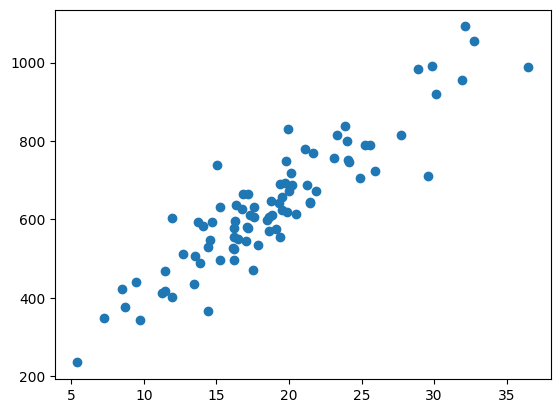

In [42]:
import matplotlib.pyplot as plt
plt.scatter(final_df.iloc[:87]['Density'], final_df.iloc[:87]['Total PCU per hour'])
plt.show()

In [43]:
final_df['Total PCU per hour'].describe()

count       88.000000
mean        21.558447
std       5755.933071
min     -53338.881514
25%        533.188527
50%        615.438100
75%        719.645072
max       1091.928470
Name: Total PCU per hour, dtype: float64

: 